Import dataset and libraries

In [ ]:
# Install SHAP
!pip install shap

In [ ]:
# Import libraries
import shap
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.utils.class_weight import compute_class_weight

In [ ]:
# Mount with Google Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Import the training and testing dataset
import pandas as pd
training_data = pd.read_csv('/content/drive/MyDrive/XAI Final Assessment/Training_set_heart.csv')
testing_data = pd.read_csv('/content/drive/MyDrive/XAI Final Assessment/Testing_set_heart.csv')

EDA

In [ ]:
print(training_data.head())

   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   48    1   2       124   255    1        1      175      0      0.0      2   
1   68    0   2       120   211    0        0      115      0      1.5      1   
2   46    1   0       120   249    0        0      144      0      0.8      2   
3   60    1   0       130   253    0        1      144      1      1.4      2   
4   43    1   0       115   303    0        1      181      0      1.2      1   

   ca  thal  target  
0   2     2       1  
1   0     2       1  
2   0     3       0  
3   1     3       0  
4   0     2       1  


In [ ]:
print(testing_data.head())

   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   46    0   0       138   243    0        0      152      1      0.0      1   
1   45    0   0       138   236    0        0      152      1      0.2      1   
2   59    1   3       160   273    0        0      125      0      0.0      2   
3   44    0   2       108   141    0        1      175      0      0.6      1   
4   47    1   2       108   243    0        1      152      0      0.0      2   

   ca  thal  
0   0     2  
1   0     2  
2   0     2  
3   0     2  
4   0     2  


In [ ]:
# Summary of the training dataset
print(training_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 212 entries, 0 to 211
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       212 non-null    int64  
 1   sex       212 non-null    int64  
 2   cp        212 non-null    int64  
 3   trestbps  212 non-null    int64  
 4   chol      212 non-null    int64  
 5   fbs       212 non-null    int64  
 6   restecg   212 non-null    int64  
 7   thalach   212 non-null    int64  
 8   exang     212 non-null    int64  
 9   oldpeak   212 non-null    float64
 10  slope     212 non-null    int64  
 11  ca        212 non-null    int64  
 12  thal      212 non-null    int64  
 13  target    212 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 23.3 KB
None


In [ ]:
# Summary of the testing dataset
print(testing_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91 entries, 0 to 90
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       91 non-null     int64  
 1   sex       91 non-null     int64  
 2   cp        91 non-null     int64  
 3   trestbps  91 non-null     int64  
 4   chol      91 non-null     int64  
 5   fbs       91 non-null     int64  
 6   restecg   91 non-null     int64  
 7   thalach   91 non-null     int64  
 8   exang     91 non-null     int64  
 9   oldpeak   91 non-null     float64
 10  slope     91 non-null     int64  
 11  ca        91 non-null     int64  
 12  thal      91 non-null     int64  
dtypes: float64(1), int64(12)
memory usage: 9.4 KB
None


In [ ]:
# Descriptive statistics on training dataset
print(training_data.describe())

              age         sex          cp    trestbps        chol         fbs  \
count  212.000000  212.000000  212.000000  212.000000  212.000000  212.000000   
mean    54.561321    0.688679    0.915094  132.127358  247.830189    0.165094   
std      9.493376    0.464130    1.008193   17.440700   53.199877    0.372144   
min     29.000000    0.000000    0.000000   94.000000  126.000000    0.000000   
25%     47.000000    0.000000    0.000000  120.000000  211.750000    0.000000   
50%     57.000000    1.000000    1.000000  130.000000  240.500000    0.000000   
75%     61.250000    1.000000    2.000000  140.000000  277.000000    0.000000   
max     77.000000    1.000000    3.000000  192.000000  564.000000    1.000000   

          restecg     thalach       exang     oldpeak       slope          ca  \
count  212.000000  212.000000  212.000000  212.000000  212.000000  212.000000   
mean     0.537736  148.995283    0.330189    1.008491    1.448113    0.783019   
std      0.527437   23.3326

In [ ]:
# Descriptive statistics on testing dataset
print(testing_data.describe())

             age        sex         cp    trestbps        chol        fbs  \
count  91.000000  91.000000  91.000000   91.000000   91.000000  91.000000   
mean   53.912088   0.670330   1.087912  130.450549  242.615385   0.109890   
std     8.074168   0.472698   1.081648   17.804658   48.578864   0.314485   
min    34.000000   0.000000   0.000000   94.000000  141.000000   0.000000   
25%    48.000000   0.000000   0.000000  120.000000  207.000000   0.000000   
50%    54.000000   1.000000   1.000000  130.000000  240.000000   0.000000   
75%    59.000000   1.000000   2.000000  140.000000  272.000000   0.000000   
max    74.000000   1.000000   3.000000  200.000000  417.000000   1.000000   

         restecg     thalach      exang    oldpeak      slope         ca  \
count  91.000000   91.000000  91.000000  91.000000  91.000000  91.000000   
mean    0.505495  151.164835   0.318681   1.112088   1.285714   0.604396   
std     0.524375   21.927286   0.468547   1.208381   0.637455   0.905282   
mi

In [ ]:
# Check for missing values on training dataset
print(training_data.isnull().sum())

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64


In [ ]:
# Check for missing values on testing dataset
print(testing_data.isnull().sum())

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
dtype: int64


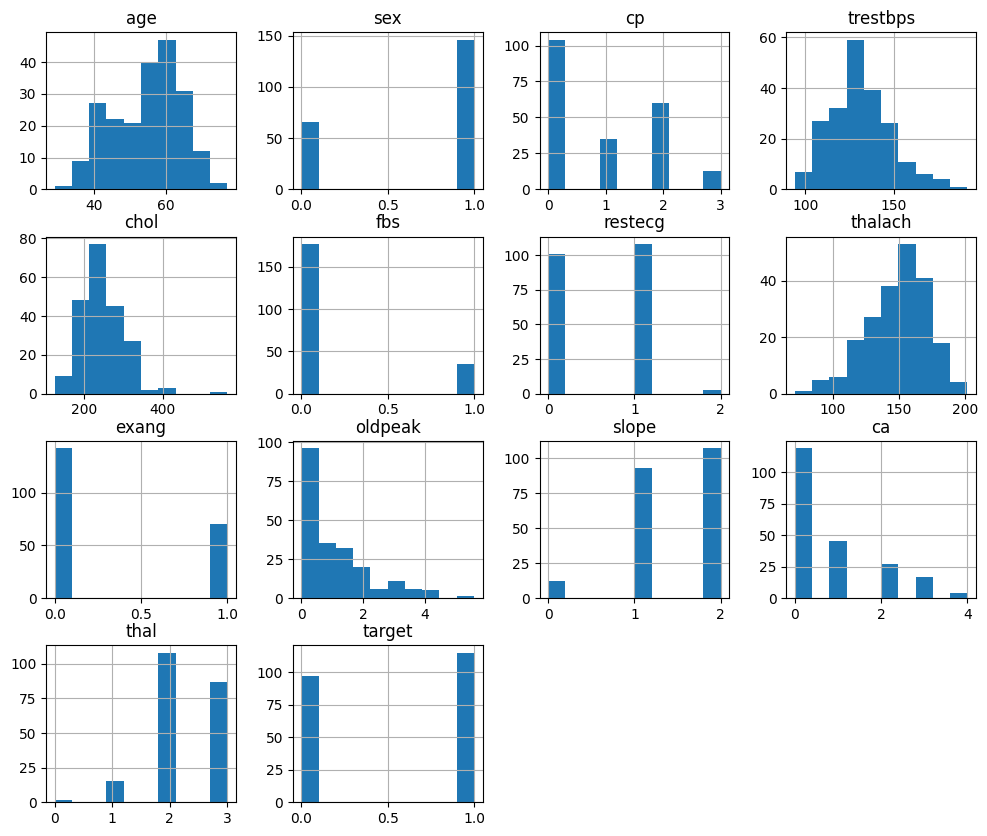

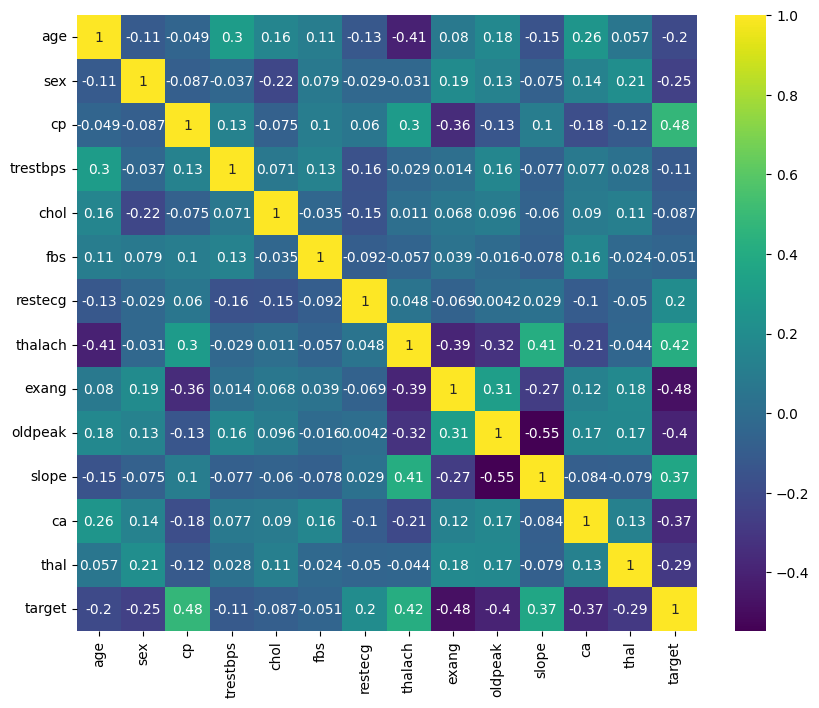

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
# Training dataset
# Histograms for distribution of numeric variables
numeric_training = training_data.select_dtypes(include=[np.number])
numeric_training.hist(figsize=(12, 10))
plt.show()

# Scatter plots or correlation matrices for relationships among numeric variables
plt.figure(figsize=(10, 8))
sns.heatmap(numeric_training.corr(), annot=True, cmap='viridis')
plt.show()

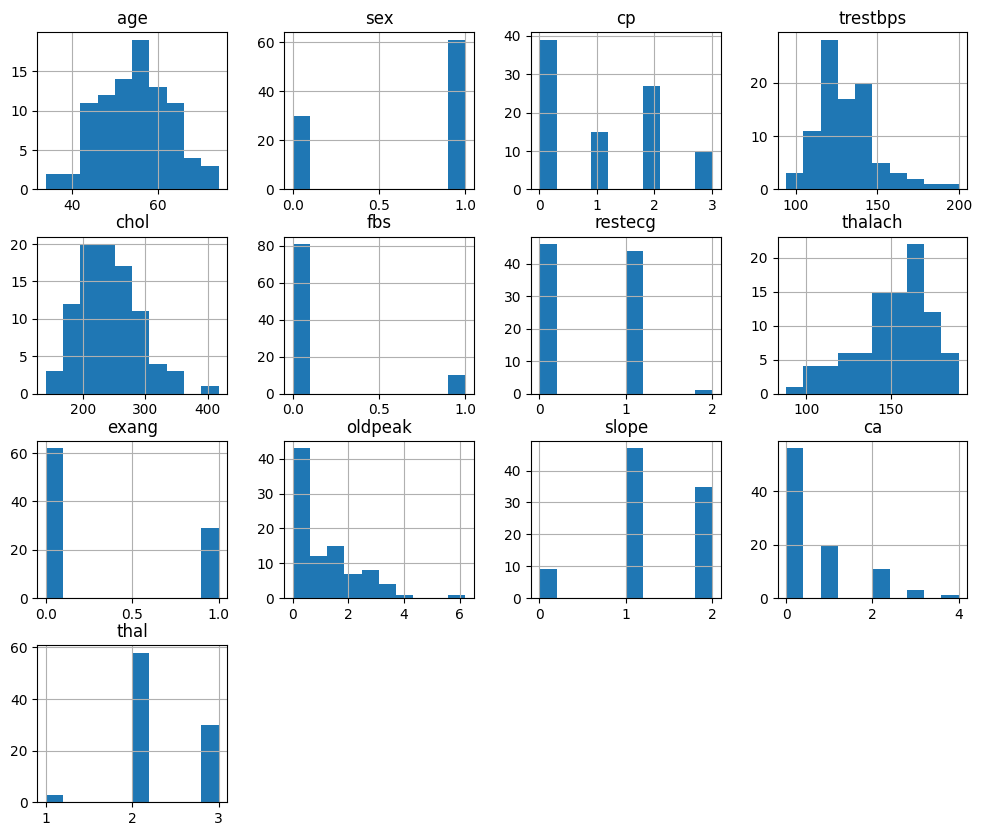

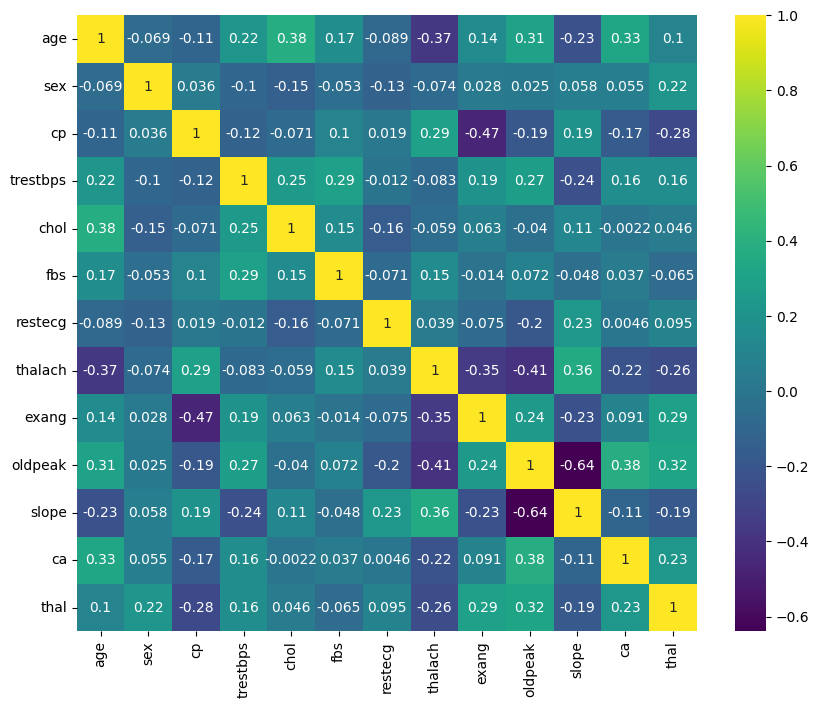

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
# Testing dataset
# Histograms for distribution of numeric variables
numeric_testing = testing_data.select_dtypes(include=[np.number])
numeric_testing.hist(figsize=(12, 10))
plt.show()

# Scatter plots or correlation matrices for relationships among numeric variables
plt.figure(figsize=(10, 8))
sns.heatmap(numeric_testing.corr(), annot=True, cmap='viridis')
plt.show()

Train-test split & feature engineering

In [ ]:
# Training
from sklearn.model_selection import train_test_split

X_train = training_data.drop('target', axis=1)
y_train = training_data['target']


In [ ]:
# Split the training set into train and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)


In [ ]:
from sklearn.preprocessing import StandardScaler

# Feature Scaling
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(testing_data)

In [ ]:
# Compute class weights
class_weights = compute_class_weight(class_weight='balanced', classes=np.unique(y_train), y=y_train)
class_weights_dict = dict(zip(np.unique(y_train), class_weights))

Logistic Regression

In [ ]:
# Logistic Regression

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, f1_score

logreg_model = LogisticRegression(random_state=42, class_weight=class_weights_dict)

logreg_model.fit(X_train, y_train)

y_val_pred = logreg_model.predict(X_val)

# Evaluate
accuracy = accuracy_score(y_val, y_val_pred)
conf_matrix = confusion_matrix(y_val, y_val_pred)
classification_rep = classification_report(y_val, y_val_pred)
f1 = f1_score(y_val, y_val_pred, average='weighted')


# Display evaluation metrics
print(f'Accuracy: {accuracy * 100:.2f}%\n')
print(f'Weighted F1-score: {f1:.4f}')
print('Confusion Matrix:')
print(conf_matrix)
print('\nClassification Report:')
print(classification_rep)

Accuracy: 86.05%

Weighted F1-score: 0.8606
Confusion Matrix:
[[18  2]
 [ 4 19]]

Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.90      0.86        20
           1       0.90      0.83      0.86        23

    accuracy                           0.86        43
   macro avg       0.86      0.86      0.86        43
weighted avg       0.86      0.86      0.86        43



lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


Feature Importance based on Logistic Regression

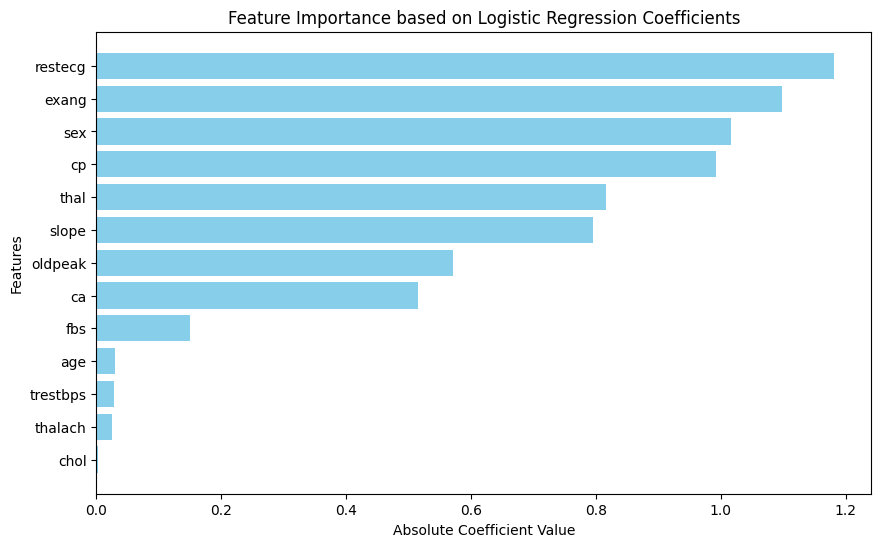

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

coefficients = logreg_model.coef_[0]
feature_names = X_train.columns

feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Coefficient': coefficients})
feature_importance_df['Absolute Coefficient'] = feature_importance_df['Coefficient'].abs()

feature_importance_df = feature_importance_df.sort_values(by='Absolute Coefficient', ascending=True)


plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Absolute Coefficient'], color='skyblue')
plt.xlabel('Absolute Coefficient Value')
plt.ylabel('Features')
plt.title('Feature Importance based on Logistic Regression Coefficients')
plt.show()

Apply predictions on testing data

In [ ]:
# Predictions on testing set
y_test_pred = logreg_model.predict(X_test_scaled)

# Decide on a threshold for positive/negative predictions
threshold=0.5
inferred_decisions=(y_test_pred>threshold).astype(int)

print("Inferred Decisions:")
print(inferred_decisions)

Inferred Decisions:
[0 0 1 1 1 0 0 1 1 1 0 1 1 1 1 0 1 0 1 0 1 0 0 0 0 1 1 1 0 0 1 0 1 0 1 0 0
 0 0 1 0 1 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 1 1 1 0 1 0 1 1 1 1 1 0 1 1 0 1
 0 1 0 1 1 0 0 1 1 1 0 0 0 1 1 1 1]


X does not have valid feature names, but LogisticRegression was fitted with feature names


In [ ]:
#Ensure feature names match
print("Training Set Features:", X_train.columns)
print("Testing Set Features:", testing_data.columns)

Training Set Features: Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal'],
      dtype='object')
Testing Set Features: Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal'],
      dtype='object')


SHAP for explainability

In [ ]:
# SHAP explainer
import shap

explainer = shap.LinearExplainer(logreg_model, X_test_scaled)
shap_values_val = explainer.shap_values(X_val)

shap_values_test = explainer.shap_values(X_test_scaled)

In [ ]:
# Convert to DataFrame
sample = pd.DataFrame(X_test_scaled, columns=testing_data.columns)

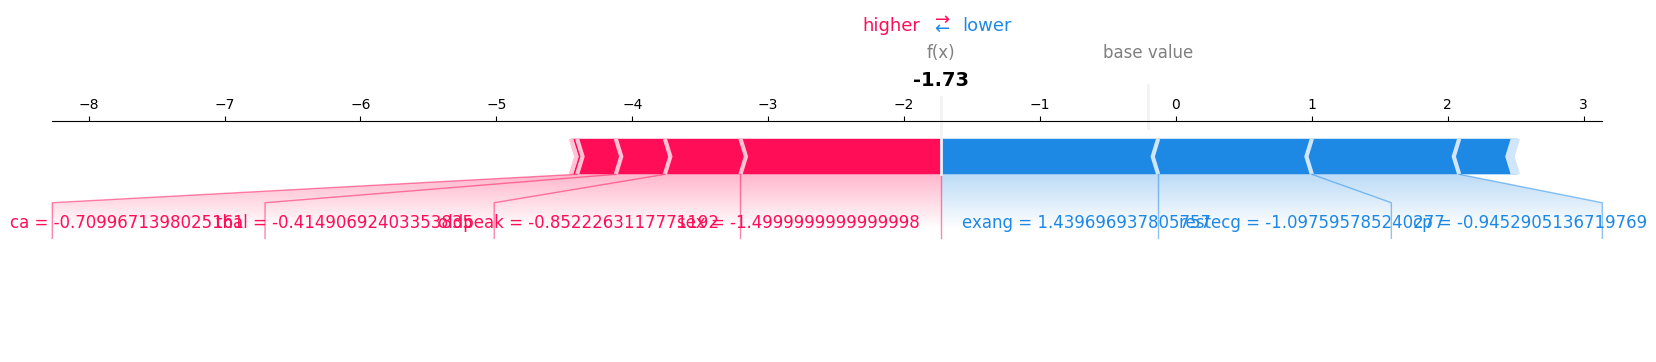



Probability: 0.0376



In [ ]:
# Force plot for first row of testing data
# Selecting the first row of the testing data
sample = sample.iloc[[0]]

shap_values_sample = explainer.shap_values(sample)

intercept = logreg_model.intercept_[0]
coefficients = logreg_model.coef_[0]
z = intercept + np.dot(coefficients, shap_values_sample.flatten())
probability = 1 / (1 + np.exp(-z))

# Generate force plot
shap.force_plot(explainer.expected_value, shap_values_sample, sample, matplotlib=True)

print("\n")
print(f'Probability: {probability:.4f}\n')

In [ ]:
# Force plot for all rows of testing data
shap_values_test = explainer.shap_values(X_test_scaled)
shap.initjs()
feature_names = X_val.columns

# Generate force plot for all rows
shap.force_plot(explainer.expected_value, shap_values_test, X_test_scaled, X_val.columns)

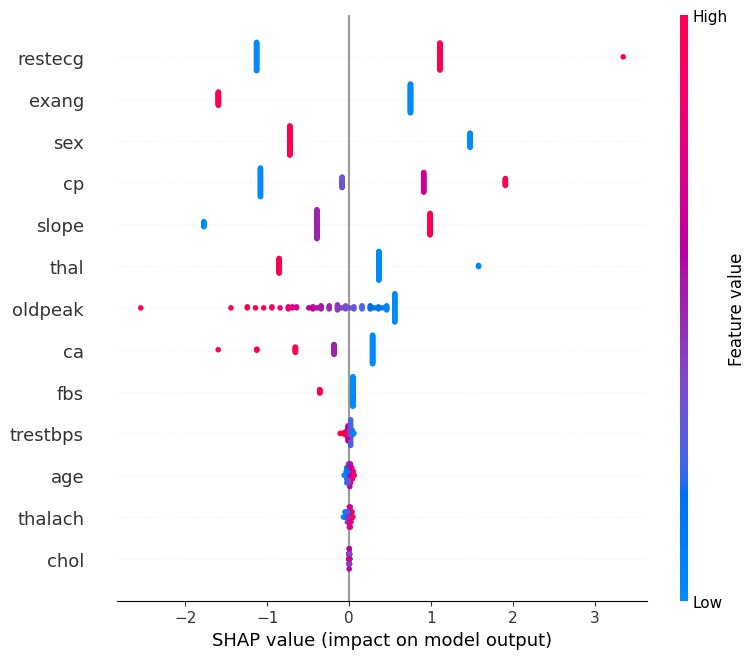

In [ ]:
# Summary plot using all features
X_test_df = pd.DataFrame(X_test_scaled, columns=testing_data.columns)
shap_values_test_all = explainer.shap_values(X_test_df)

feature_names = X_val.columns

shap.summary_plot(shap_values_test_all, X_test_scaled,feature_names)

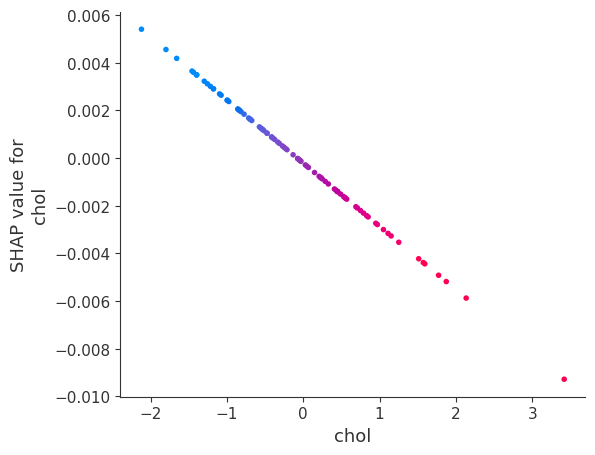

In [ ]:
# Dependence plot
chol_index = X_test_df.columns.get_loc('chol')
shap.dependence_plot(chol_index, shap_values_test_all, X_test_df, interaction_index="chol", show=False)

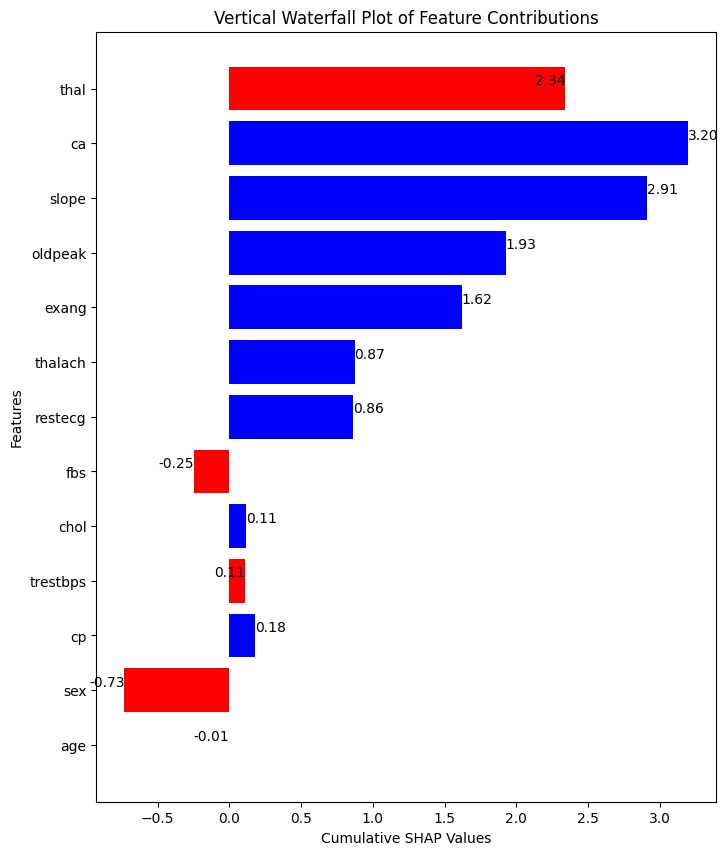

In [ ]:
import shap
import matplotlib.pyplot as plt
import numpy as np

shap_values_val = explainer.shap_values(X_val_scaled)

instance_index = 0
shap_values_sample = shap_values_val[instance_index]

feature_names = X_val.columns

# Calculate the cumulative sum of SHAP values
cumulative_shap_values = shap_values_sample.cumsum()

# Define colors based on the direction of contribution
colors = np.where(shap_values_sample > 0, 'blue', 'red')

# Create the vertical waterfall plot with directions and values
plt.figure(figsize=(8, 10))
bars = plt.barh(feature_names, cumulative_shap_values, color=colors)
plt.ylabel('Features')
plt.xlabel('Cumulative SHAP Values')
plt.title('Vertical Waterfall Plot of Feature Contributions')

# Add direction labels and values on each bar
for bar, value, shap_value in zip(bars, cumulative_shap_values, shap_values_sample):
    width = bar.get_width()
    plt.text(width, bar.get_y() + bar.get_height() / 2, f"{value:.2f}\n",
             ha='left' if shap_value > 0 else 'right', va='center', color='black')

plt.show()
